# *Proyecto de Análisis de Datos* 

### **Hecho por: Fís. Carlos Alexis Barrios Bello**

# Planteamiento del problema:

El objetivo inicial fue transformar un problema de predicción del tiempo de vida restante (RUL) en un problema de clasificación más manejable, definiendo categorías basadas en rangos de vida útil. Este enfoque permitió:

- Reducir la complejidad del problema al evitar la predicción de valores continuos.
- Evaluar el desempeño de diferentes modelos clasificadores en una variedad de escenarios.
- Mejorar los resultados en comparación al enfoque tradicional de regresión lineal


# Importación de los datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suprimir todos los FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)


index_names= ['unit_number', 'time_cycles']
setting_names = ['set_1', 'set_2', 'set_3']
sensor_names = ['sensor1', 'sensor2', 'sensor3', 'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor10', 'sensor11', 'sensor12', 'sensor13'
                , 'sensor14', 'sensor15', 'sensor16', 'sensor17', 'sensor18', 'sensor19', 'sensor20', 'sensor21']
col_names = index_names + setting_names + sensor_names

data_train = pd.read_csv("C:\\Users\\Carlo\\Desktop\\IA\\tercer semestre\\analisis de datos\\CMAPSSData\\train_FD001.txt", sep='\\s+', header=None, index_col=False, names = col_names)
data_test = pd.read_csv("C:\\Users\\Carlo\\Desktop\\IA\\tercer semestre\\analisis de datos\\CMAPSSData\\test_FD001.txt", sep='\\s+', header=None, index_col=False, names = col_names)
data_test_rul = pd.read_csv("C:\\Users\\Carlo\\Desktop\\IA\\tercer semestre\\analisis de datos\\CMAPSSData\\RUL_FD001.txt", sep='\\s+', header=None, index_col=False, names = ['RUL'])

In [2]:
train = data_train.copy()
test = data_test.copy()
test_rul = data_test_rul.copy()

max_time_cycles_train = train[index_names].groupby(by='unit_number').max()

In [3]:
max_time_cycles_train['time_cycles'].sort_values()

unit_number
39    128
91    135
70    137
57    137
58    147
     ... 
83    293
67    313
96    336
92    341
69    362
Name: time_cycles, Length: 100, dtype: int64

In [4]:
def addRUL(df):
    units = df.groupby('unit_number')
    max_cycle = units['time_cycles'].max()
    merged = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_number', right_index=True)
    merged['RUL'] = merged['max_cycle'] - merged['time_cycles']
    merged = merged.drop('max_cycle', axis=1)
    return merged

train = addRUL(train)

# Análisis exploratorio de los datos 

In [5]:
# Inspección inicial de los datos
print("Información general del conjunto de datos:")
print(train.info())

Información general del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unit_number  20631 non-null  int64  
 1   time_cycles  20631 non-null  int64  
 2   set_1        20631 non-null  float64
 3   set_2        20631 non-null  float64
 4   set_3        20631 non-null  float64
 5   sensor1      20631 non-null  float64
 6   sensor2      20631 non-null  float64
 7   sensor3      20631 non-null  float64
 8   sensor4      20631 non-null  float64
 9   sensor5      20631 non-null  float64
 10  sensor6      20631 non-null  float64
 11  sensor7      20631 non-null  float64
 12  sensor8      20631 non-null  float64
 13  sensor9      20631 non-null  float64
 14  sensor10     20631 non-null  float64
 15  sensor11     20631 non-null  float64
 16  sensor12     20631 non-null  float64
 17  sensor13     20631 non-null  float64
 18  sen

In [6]:
print("\nPrimeras filas del conjunto de datos:")
print(train[sensor_names].head())


Primeras filas del conjunto de datos:
   sensor1  sensor2  sensor3  sensor4  sensor5  sensor6  sensor7  sensor8  \
0   518.67   641.82  1589.70  1400.60    14.62    21.61   554.36  2388.06   
1   518.67   642.15  1591.82  1403.14    14.62    21.61   553.75  2388.04   
2   518.67   642.35  1587.99  1404.20    14.62    21.61   554.26  2388.08   
3   518.67   642.35  1582.79  1401.87    14.62    21.61   554.45  2388.11   
4   518.67   642.37  1582.85  1406.22    14.62    21.61   554.00  2388.06   

   sensor9  sensor10  ...  sensor12  sensor13  sensor14  sensor15  sensor16  \
0  9046.19       1.3  ...    521.66   2388.02   8138.62    8.4195      0.03   
1  9044.07       1.3  ...    522.28   2388.07   8131.49    8.4318      0.03   
2  9052.94       1.3  ...    522.42   2388.03   8133.23    8.4178      0.03   
3  9049.48       1.3  ...    522.86   2388.08   8133.83    8.3682      0.03   
4  9055.15       1.3  ...    522.19   2388.04   8133.80    8.4294      0.03   

   sensor17  sensor18  

In [7]:
print("\nDescripción estadística de las columnas numéricas:")
print(train[sensor_names].describe())


Descripción estadística de las columnas numéricas:
        sensor1       sensor2       sensor3       sensor4       sensor5  \
count  20631.00  20631.000000  20631.000000  20631.000000  2.063100e+04   
mean     518.67    642.680934   1590.523119   1408.933782  1.462000e+01   
std        0.00      0.500053      6.131150      9.000605  1.776400e-15   
min      518.67    641.210000   1571.040000   1382.250000  1.462000e+01   
25%      518.67    642.325000   1586.260000   1402.360000  1.462000e+01   
50%      518.67    642.640000   1590.100000   1408.040000  1.462000e+01   
75%      518.67    643.000000   1594.380000   1414.555000  1.462000e+01   
max      518.67    644.530000   1616.910000   1441.490000  1.462000e+01   

            sensor6       sensor7       sensor8       sensor9  sensor10  ...  \
count  20631.000000  20631.000000  20631.000000  20631.000000   20631.0  ...   
mean      21.609803    553.367711   2388.096652   9065.242941       1.3  ...   
std        0.001389      0.88509

<Figure size 2000x1500 with 0 Axes>

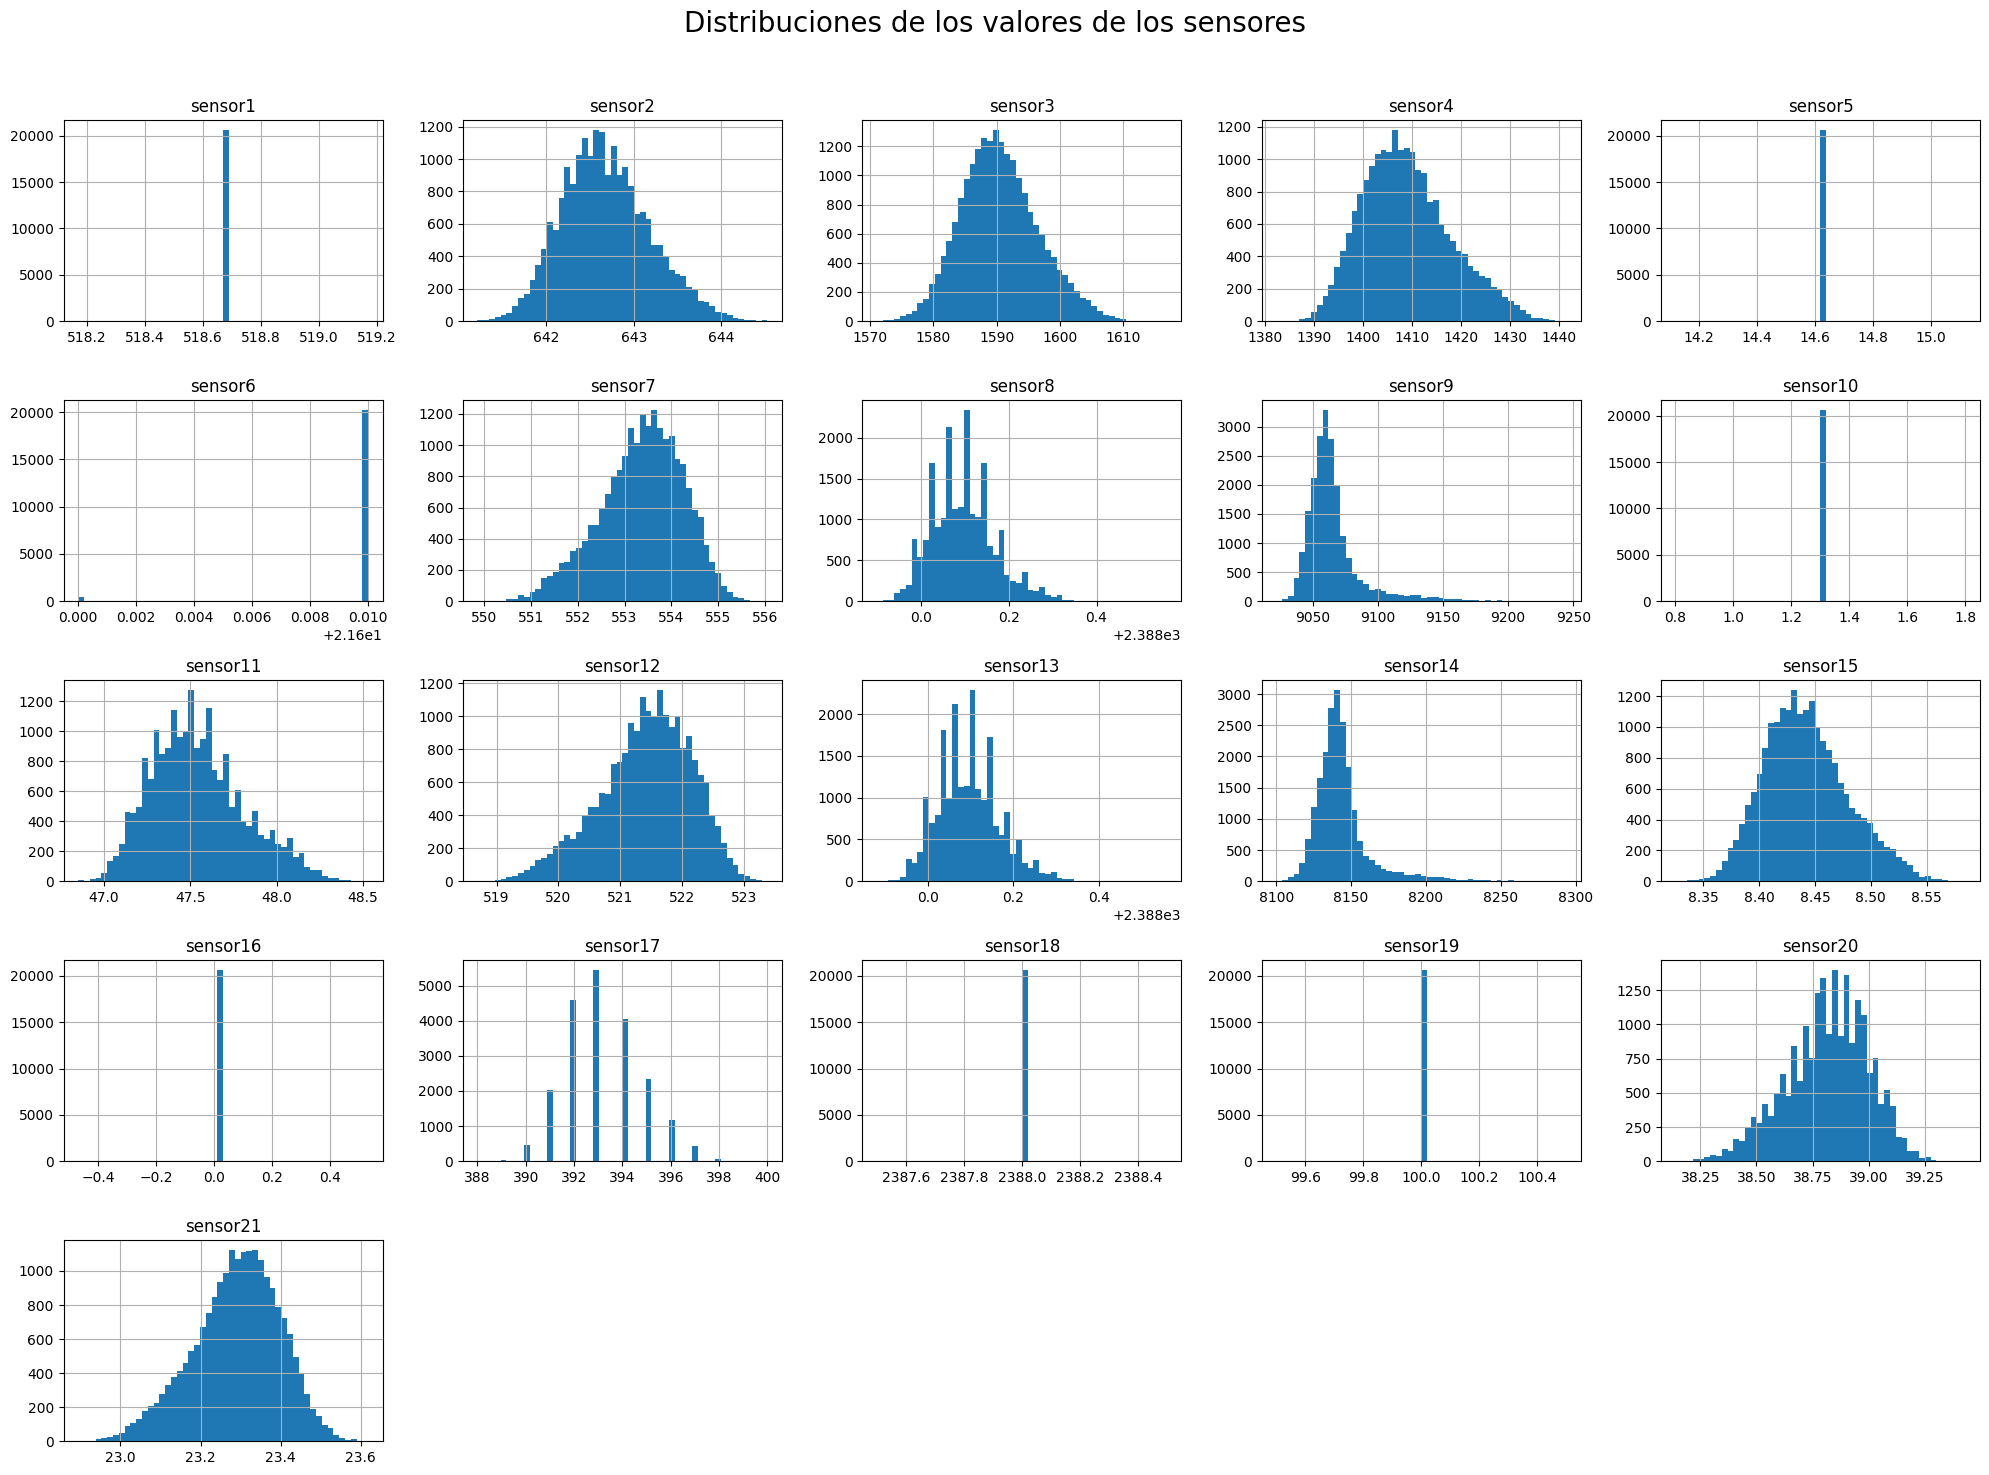

In [8]:
# Distribución de valores en los sensores
plt.figure(figsize=(20, 15))
sensor_columns = [col for col in train.columns if 'sensor' in col]
train[sensor_columns].hist(bins=50, figsize=(20, 15), layout=(5, 5))
plt.suptitle("Distribuciones de los valores de los sensores", size=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

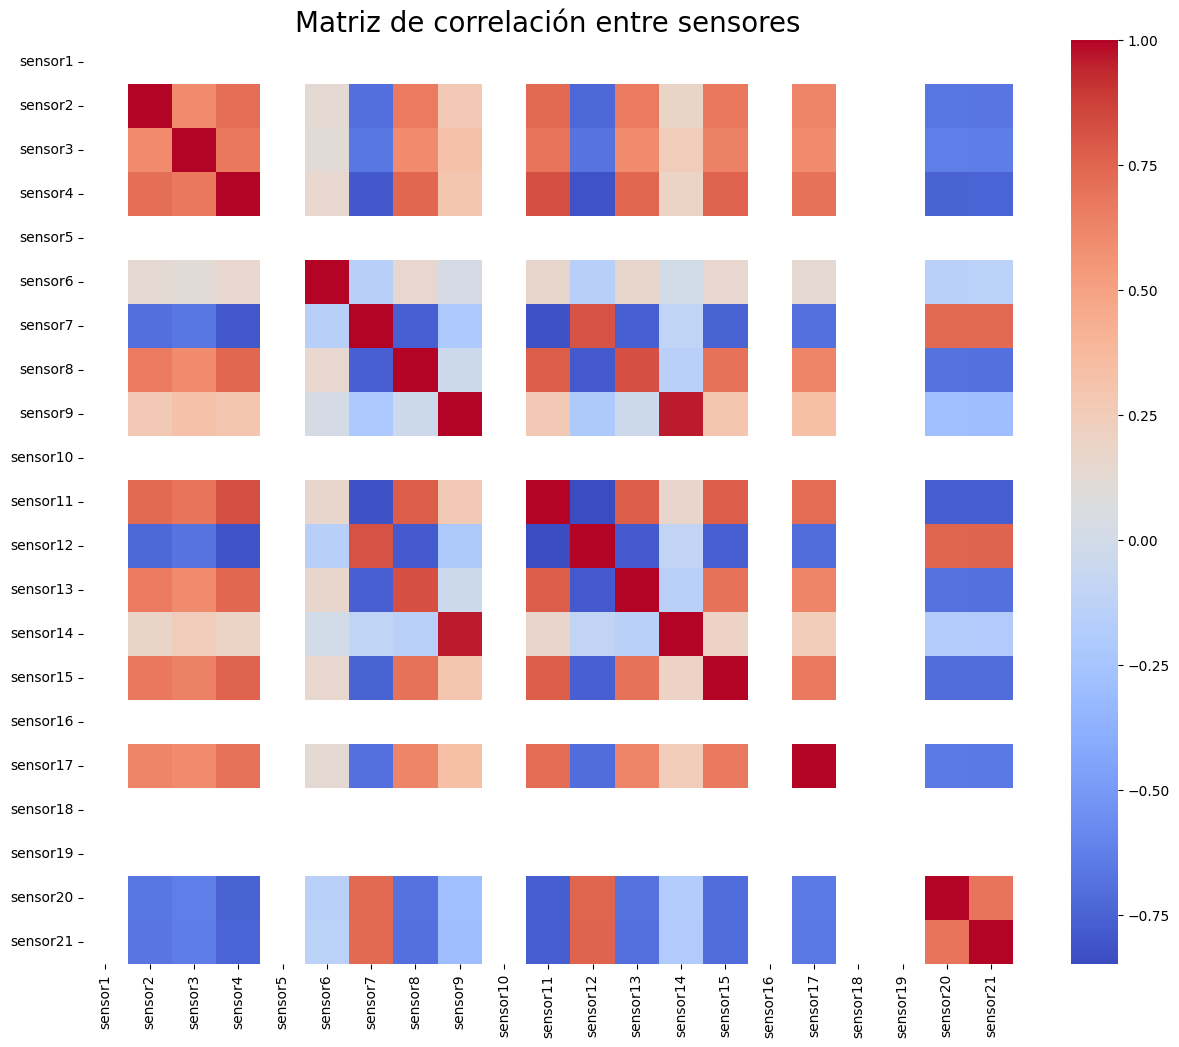

In [9]:
# Matriz de correlación
correlation_matrix = train[sensor_columns].corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre sensores", size=20)
plt.show()

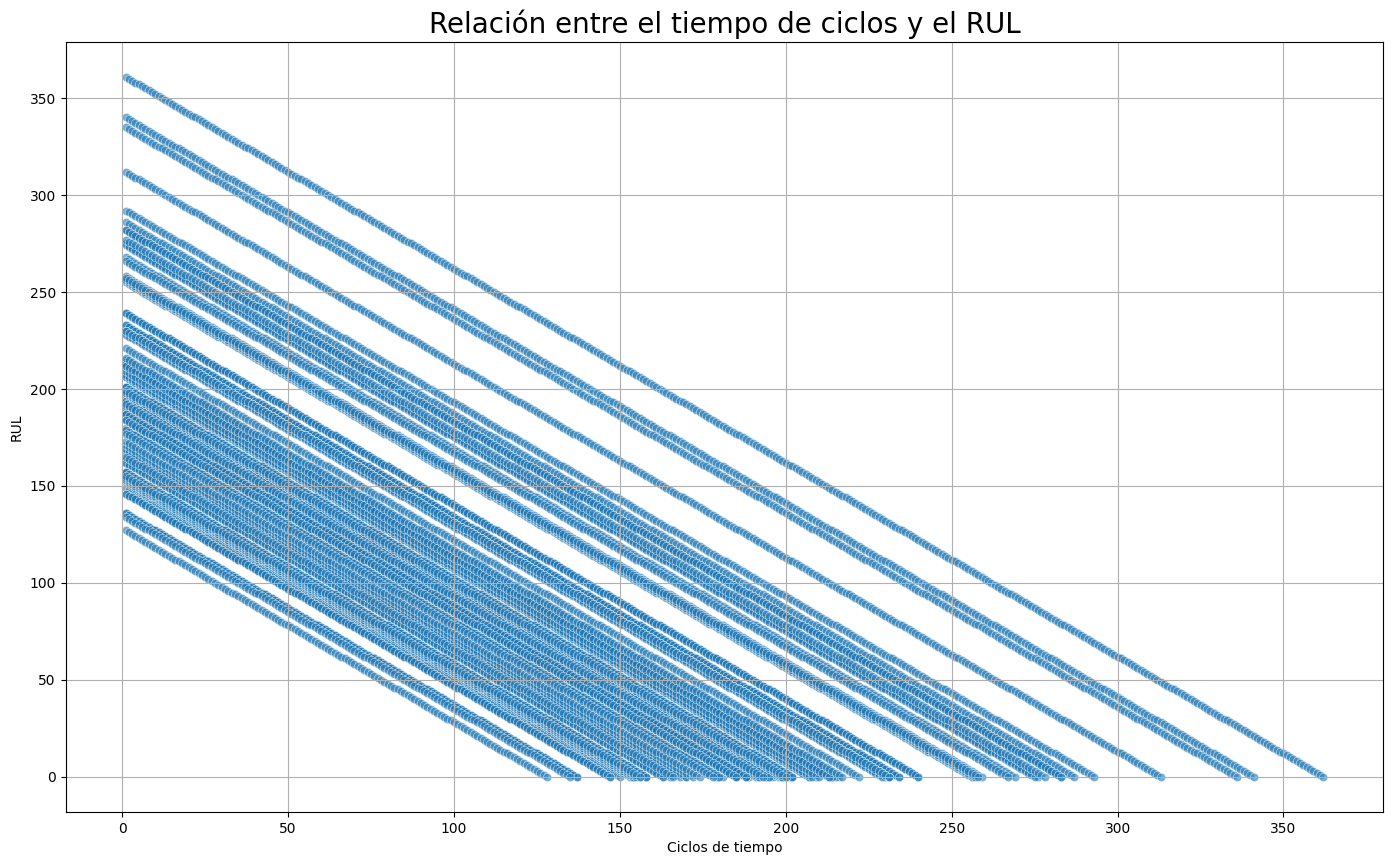

In [10]:
# Relación entre ciclos de tiempo y RUL
plt.figure(figsize=(17, 10))
sns.scatterplot(x=train['time_cycles'], y=train['RUL'], alpha=0.6)
plt.title("Relación entre el tiempo de ciclos y el RUL", size=20)
plt.xlabel("Ciclos de tiempo")
plt.ylabel("RUL")
plt.grid(True)
plt.show()

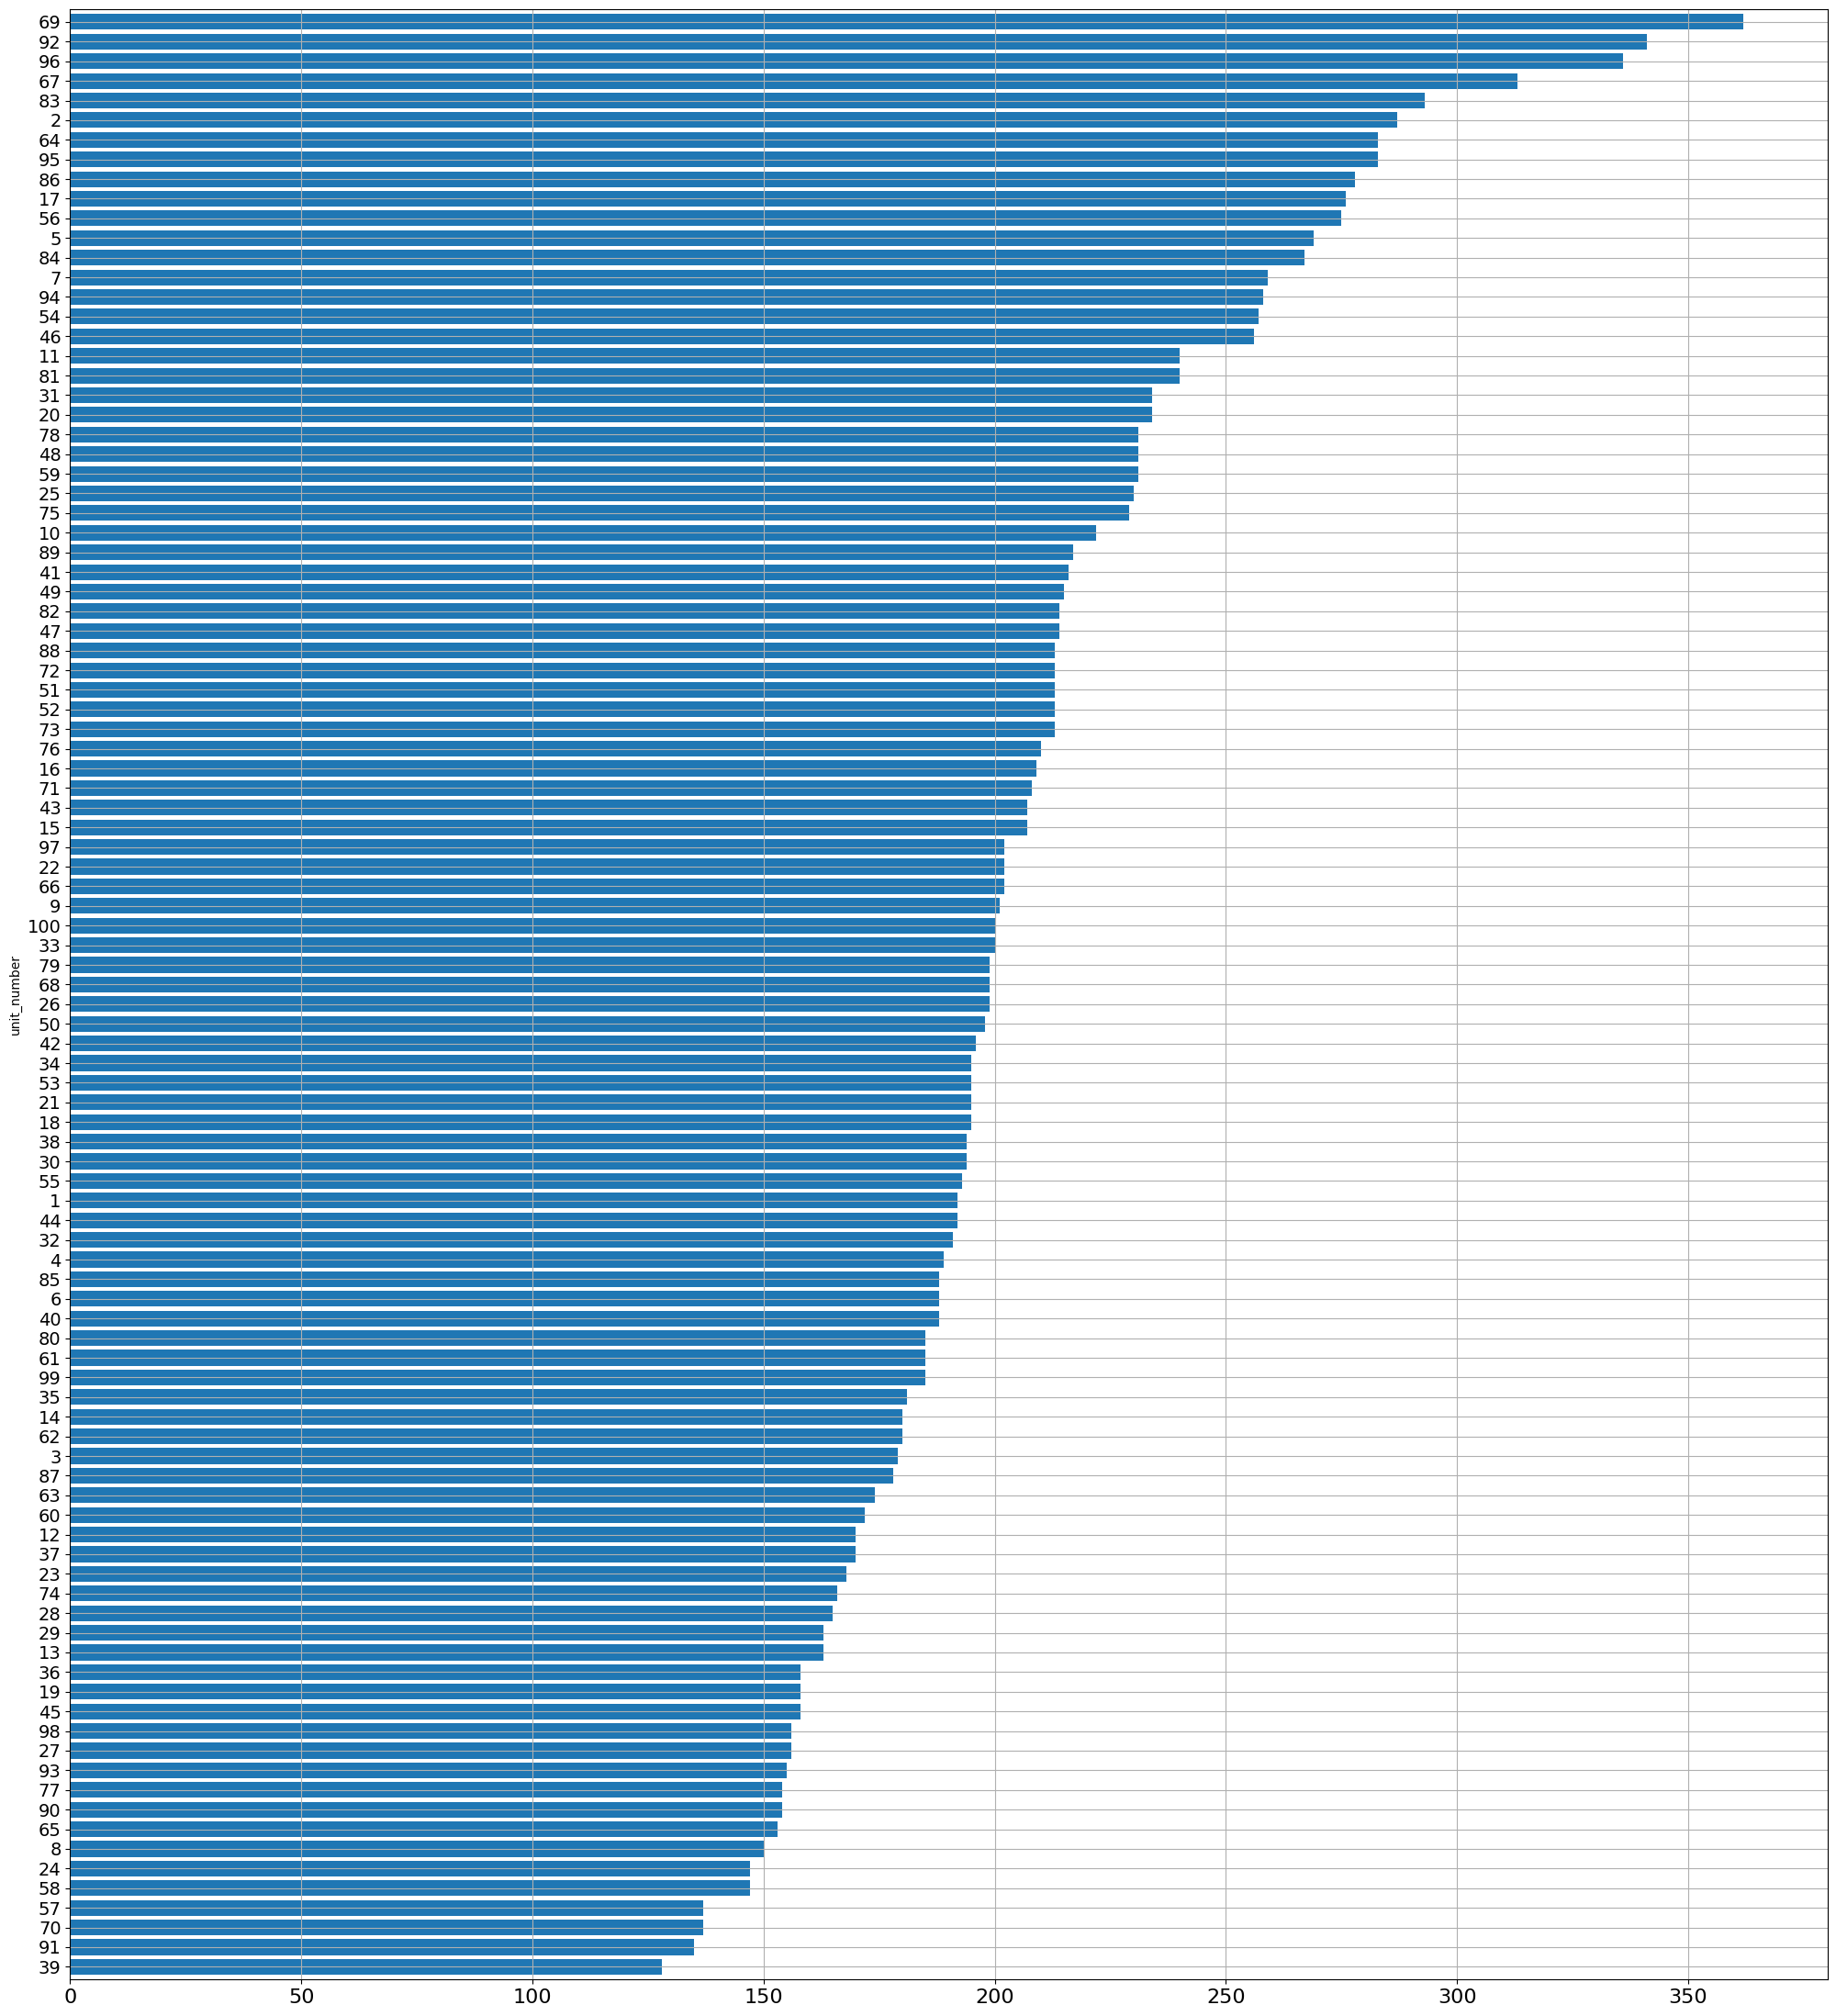

In [11]:
#Plot de cantidad de ciclos máximos para cada unidad

plt.figure(figsize=(20,22))
ax= max_time_cycles_train['time_cycles'].sort_values().plot(kind='barh', width=0.8, stacked=True, align='center')
plt.grid(True)
plt.tight_layout()
plt.xticks(size=16)
plt.yticks(size=14)
plt.show()

# Preprocesamiento de la base de datos

## Quitar características que no aportan nada importante con base a la desviación estándar. (sensores)

In [12]:
X = train[sensor_names]
std_devs = X.std()
selected_sensors = std_devs[std_devs > 1e-2].index

# Filtrar solo las columnas seleccionadas para el escalamiento
X_to_scale = train[selected_sensors]
X_to_scale

,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735
20627,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594
20628,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333
20629,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640


## Aplicar estandarización a los datos

In [13]:
from sklearn.preprocessing import StandardScaler

# Aplicar el escalamiento estándar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_to_scale)

# Convertir los datos escalados a un DataFrame con los mismos nombres de columnas
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_sensors, index=train.index)

X_scaled_df

,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,-1.721725,-0.134255,-0.925936,1.121141,-0.516338,-0.862813,-0.266467,0.334262,-1.058890,-0.269071,-0.603816,-0.781710,1.348493,1.194427
1,-1.061780,0.211528,-0.643726,0.431930,-0.798093,-0.958818,-0.191583,1.174899,-0.363646,-0.642845,-0.275852,-0.781710,1.016528,1.236922
2,-0.661813,-0.413166,-0.525953,1.008155,-0.234584,-0.557139,-1.015303,1.364721,-0.919841,-0.551629,-0.649144,-2.073094,0.739891,0.503423
3,-0.661813,-1.261314,-0.784831,1.222827,0.188048,-0.713826,-1.539489,1.961302,-0.224597,-0.520176,-1.971665,-0.781710,0.352598,0.777792
4,-0.621816,-1.251528,-0.301518,0.714393,-0.516338,-0.457059,-0.977861,1.052871,-0.780793,-0.521748,-0.339845,-0.136018,0.463253,1.059552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,1.618000,1.216258,2.188375,-2.189329,1.315066,0.012547,1.980044,-2.607969,2.278282,-0.322542,1.425294,2.446751,-1.805173,-2.921113
20627,1.717992,2.279706,2.738351,-2.833345,1.878576,-0.006020,1.867718,-2.350355,1.722087,-0.380207,1.913240,1.155367,-2.856395,-1.203764
20628,1.478011,1.946971,2.138377,-2.742957,2.019453,0.029755,2.054927,-1.902919,2.000184,-0.141684,3.265092,3.092444,-2.081810,-3.292481
20629,1.098043,2.403666,1.955051,-3.036719,2.160330,0.383884,3.178182,-2.363913,1.861136,-0.233948,2.579834,1.155367,-2.911722,-2.085072


In [14]:
# Seleccionar la columna 'unit_number' para conservarla
unit_number = train['unit_number']
# Unir la columna 'unit_number' nuevamente
train_scaled = pd.concat([unit_number, X_scaled_df], axis=1)
train_scaled

,unit_number,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,1,-1.721725,-0.134255,-0.925936,1.121141,-0.516338,-0.862813,-0.266467,0.334262,-1.058890,-0.269071,-0.603816,-0.781710,1.348493,1.194427
1,1,-1.061780,0.211528,-0.643726,0.431930,-0.798093,-0.958818,-0.191583,1.174899,-0.363646,-0.642845,-0.275852,-0.781710,1.016528,1.236922
2,1,-0.661813,-0.413166,-0.525953,1.008155,-0.234584,-0.557139,-1.015303,1.364721,-0.919841,-0.551629,-0.649144,-2.073094,0.739891,0.503423
3,1,-0.661813,-1.261314,-0.784831,1.222827,0.188048,-0.713826,-1.539489,1.961302,-0.224597,-0.520176,-1.971665,-0.781710,0.352598,0.777792
4,1,-0.621816,-1.251528,-0.301518,0.714393,-0.516338,-0.457059,-0.977861,1.052871,-0.780793,-0.521748,-0.339845,-0.136018,0.463253,1.059552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,1.618000,1.216258,2.188375,-2.189329,1.315066,0.012547,1.980044,-2.607969,2.278282,-0.322542,1.425294,2.446751,-1.805173,-2.921113
20627,100,1.717992,2.279706,2.738351,-2.833345,1.878576,-0.006020,1.867718,-2.350355,1.722087,-0.380207,1.913240,1.155367,-2.856395,-1.203764
20628,100,1.478011,1.946971,2.138377,-2.742957,2.019453,0.029755,2.054927,-1.902919,2.000184,-0.141684,3.265092,3.092444,-2.081810,-3.292481
20629,100,1.098043,2.403666,1.955051,-3.036719,2.160330,0.383884,3.178182,-2.363913,1.861136,-0.233948,2.579834,1.155367,-2.911722,-2.085072


# Ingeniería de características

## Adición de una nueva característica llamada "Tipo de Unidad" en donde se dividirá por el número de ciclos máximo de cada unidad y se dará una categoría.

No se buscará que esté equilibrada esta clase ya que no será la variable objetivo

Los intervalos serán los siguientes:

- Clase 0: -$\infty$ a 160  ---> *(Unidad Con Muy Baja RUL)*
- Clase 1: 161 a 190  ---> *(Unidad Con Baja RUL)*
- Clase 2: 191 a 220  ---> *(Unidad Con Media Baja RUL)*
- Clase 3: 221 a 250  ---> *(Unidad Con Media Alta RUL)*
- Clase 4: 251 a 280 ---> *(Unidad Con Alta RUL)*
- Clase 5: 281 a $\infty$    ---> *(Unidad Con Muy Alta RUL)*

In [15]:
# Crear una función para asignar clases según los intervalos dados
def assign_unit_class(max_cycle):
    if max_cycle <= 160:
        return 0  # Muy Baja RUL
    elif 161 <= max_cycle <= 190:
        return 1  # Baja RUL
    elif 191 <= max_cycle <= 220:
        return 2  # Media Baja RUL
    elif 221 <= max_cycle <= 250:
        return 3  # Media Alta RUL
    elif 251 <= max_cycle <= 280:
        return 4  # Alta RUL
    else:
        return 5  # Muy Alta RUL

In [16]:
# Calcular el número máximo de ciclos para cada unidad
unit_max_cycles = train.groupby('unit_number')['time_cycles'].max()

# Asignar la clase de unidad según el número máximo de ciclos
unit_classes = unit_max_cycles.apply(assign_unit_class)

# Agregar la clase de unidad al DataFrame original
train_scaled['unit_class'] = train_scaled['unit_number'].map(unit_classes)

# Verificar las primeras filas para confirmar que se asignaron correctamente
print(train_scaled[['unit_number', 'unit_class']].drop_duplicates().head())

     unit_number  unit_class
0              1           2
192            2           5
479            3           1
658            4           1
847            5           4


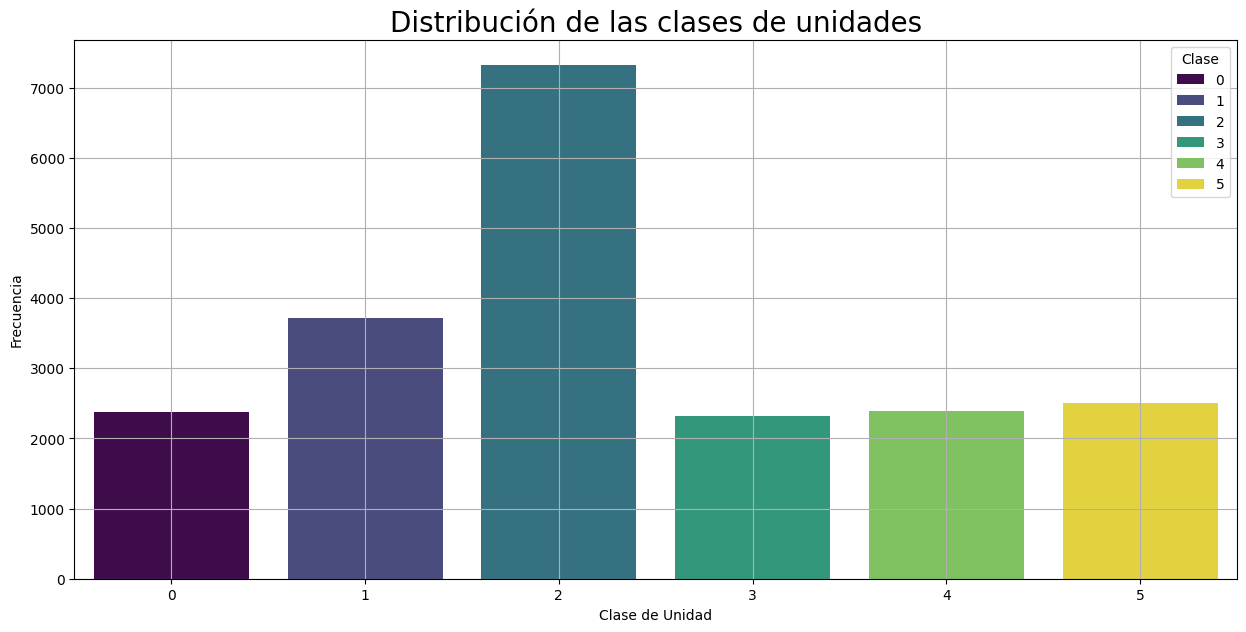

In [17]:
unit_class_distribution = train_scaled['unit_class'].value_counts().sort_index()

# Crear un DataFrame con las clases y sus frecuencias
unit_class_df = pd.DataFrame({
    'unit_class': unit_class_distribution.index,
    'frequency': unit_class_distribution.values
})

# Graficar con hue aplicado
plt.figure(figsize=(15, 7))
sns.barplot(
    data=unit_class_df,
    x='unit_class',
    y='frequency',
    hue='unit_class', 
    palette="viridis"
)
plt.title("Distribución de las clases de unidades", size=20)
plt.xlabel("Clase de Unidad")
plt.ylabel("Frecuencia")
plt.legend(title="Clase", loc="upper right")
plt.grid(True)
plt.show()

## Categorización de la variable RUL

En este punto se buscará discretizar el RUL para poder hacer una clasificación con el mismo.

Se buscará hacer esta discretización de manera subjetiva en donde se indique qué tanto RUL le queda en cualquier instancia a cualquier unidad

In [18]:
# Crear clases para el RUL
def categorize_rul(rul):
    if rul > 100:
        return 6  # Muy Alta vida útil
    elif 75 < rul <= 100:
        return 5  # Alta vida útil
    elif 50 < rul <= 75:
        return 4  # Media Alta vida útil
    elif 25 < rul <= 50:
        return 3  # Media Baja vida útil
    elif 10 < rul <= 25:
        return 2  # Baja vida útil
    else:
        return 0  # Muy Baja vida útil

# Aplicar la función a los datos
train_scaled['RUL_category'] = train['RUL'].apply(categorize_rul)

# Verificar la distribución de clases
class_distribution = train_scaled['RUL_category'].value_counts().sort_index()
print("Distribución de clases:")
print(class_distribution)

Distribución de clases:
RUL_category
0     1100
2     1500
3     2500
4     2500
5     2500
6    10531
Name: count, dtype: int64


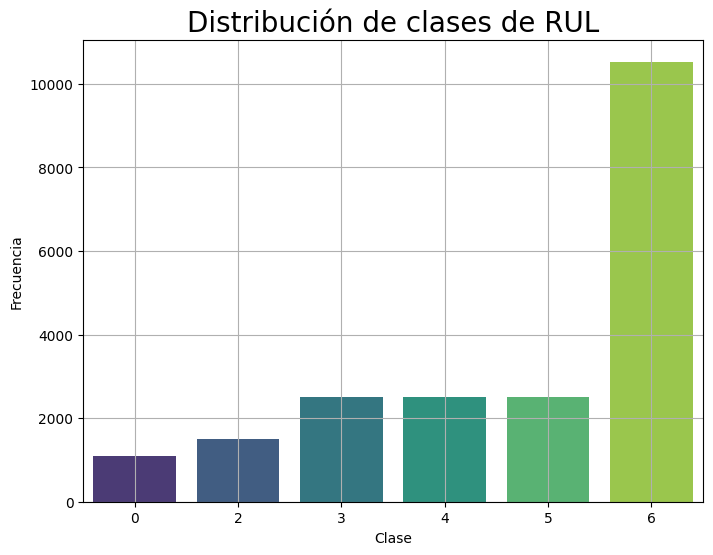

In [19]:
# Graficar la distribución de las clases
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")
plt.title("Distribución de clases de RUL", size=20)
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

In [20]:
train_scaled

,unit_number,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,unit_class,RUL_category
0,1,-1.721725,-0.134255,-0.925936,1.121141,-0.516338,-0.862813,-0.266467,0.334262,-1.058890,-0.269071,-0.603816,-0.781710,1.348493,1.194427,2,6
1,1,-1.061780,0.211528,-0.643726,0.431930,-0.798093,-0.958818,-0.191583,1.174899,-0.363646,-0.642845,-0.275852,-0.781710,1.016528,1.236922,2,6
2,1,-0.661813,-0.413166,-0.525953,1.008155,-0.234584,-0.557139,-1.015303,1.364721,-0.919841,-0.551629,-0.649144,-2.073094,0.739891,0.503423,2,6
3,1,-0.661813,-1.261314,-0.784831,1.222827,0.188048,-0.713826,-1.539489,1.961302,-0.224597,-0.520176,-1.971665,-0.781710,0.352598,0.777792,2,6
4,1,-0.621816,-1.251528,-0.301518,0.714393,-0.516338,-0.457059,-0.977861,1.052871,-0.780793,-0.521748,-0.339845,-0.136018,0.463253,1.059552,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,1.618000,1.216258,2.188375,-2.189329,1.315066,0.012547,1.980044,-2.607969,2.278282,-0.322542,1.425294,2.446751,-1.805173,-2.921113,2,0
20627,100,1.717992,2.279706,2.738351,-2.833345,1.878576,-0.006020,1.867718,-2.350355,1.722087,-0.380207,1.913240,1.155367,-2.856395,-1.203764,2,0
20628,100,1.478011,1.946971,2.138377,-2.742957,2.019453,0.029755,2.054927,-1.902919,2.000184,-0.141684,3.265092,3.092444,-2.081810,-3.292481,2,0
20629,100,1.098043,2.403666,1.955051,-3.036719,2.160330,0.383884,3.178182,-2.363913,1.861136,-0.233948,2.579834,1.155367,-2.911722,-2.085072,2,0


# Modelado

Se aplicará un Naive Bayes y Regresión Logística a esta base de datos para evaluar distintas métricas de clasificación y revisar qué tanta mejoría hubo a partir de este nuevo tratamiento de datos

In [21]:
# Eliminar la columna 'unit_number' del DataFrame
train_scaled = train_scaled.drop(columns=['unit_number'])

# Verificar las columnas restantes
print("Columnas restantes en train_scaled:")
print(train_scaled.columns)

Columnas restantes en train_scaled:
Index(['sensor2', 'sensor3', 'sensor4', 'sensor7', 'sensor8', 'sensor9',
       'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor17',
       'sensor20', 'sensor21', 'unit_class', 'RUL_category'],
      dtype='object')


## Naive Bayes

In [22]:
import time

from sklearn.preprocessing import KBinsDiscretizer
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Función para discretizar características
def discretize_features(X, n_bins=10):
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform', subsample=None)
    X_discretized = pd.DataFrame(discretizer.fit_transform(X), columns=X.columns, index=X.index)
    return X_discretized

# Entrenamiento de Naive Bayes con suavizado y vectorización
def naive_bayes_train(X, y):
    labels, label_counts = np.unique(y, return_counts=True)
    prior_probs = label_counts / len(y)
    priors = dict(zip(labels, prior_probs)) 

    cond_probs = {}
    smoothing = 1 / len(X)  # Suavizado dinámico basado en el tamaño de los datos

    for label in labels:
        subset = X[y == label]
        features_probs = {
            col: (subset[col].value_counts(normalize=True) + smoothing).to_dict()
            for col in X.columns
        }
        cond_probs[label] = features_probs

    return priors, cond_probs

# Predicción de Naive Bayes con vectorización
def naive_bayes_predict(X, priors, cond_probs):
    log_priors = {label: np.log(prob) for label, prob in priors.items()}
    predictions = []

    for _, row in X.iterrows():
        label_probs = {}
        for label, log_prior in log_priors.items():
            total_prob = log_prior
            for feature, value in row.items():
                feature_probs = cond_probs[label].get(feature, {})
                prob = feature_probs.get(value, 1e-6)
                total_prob += np.log(prob)
            label_probs[label] = total_prob
        predictions.append(max(label_probs, key=label_probs.get))

    return predictions

In [23]:
# Validación cruzada simple con discretización
def simple_cross_validate(data, target, k=10, n_bins=10):
    folds = np.array_split(data.sample(frac=1, random_state=42), k)
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for i in range(k):
        train = pd.concat([folds[j] for j in range(k) if j != i])
        test = folds[i]

        X_train = discretize_features(train.drop(target, axis=1), n_bins=n_bins)
        X_test = discretize_features(test.drop(target, axis=1), n_bins=n_bins)

        priors, cond_probs = naive_bayes_train(X_train, train[target])
        predictions = naive_bayes_predict(X_test, priors, cond_probs)

        accuracy_scores.append(accuracy_score(test[target], predictions))
        precision_scores.append(precision_score(test[target], predictions, average='macro', zero_division=0))
        recall_scores.append(recall_score(test[target], predictions, average='macro', zero_division=0))
        f1_scores.append(f1_score(test[target], predictions, average='macro', zero_division=0))

    return {
        'accuracy': (np.mean(accuracy_scores), np.std(accuracy_scores)),
        'precision': (np.mean(precision_scores), np.std(precision_scores)),
        'recall': (np.mean(recall_scores), np.std(recall_scores)),
        'f1_score': (np.mean(f1_scores), np.std(f1_scores))
    }

# Validación cruzada estratificada con discretización
def stratified_cross_validate(data, target, k=10, n_bins=10):
    data = data.sample(frac=1, random_state=42).reset_index(drop=True)
    proportions = data[target].value_counts(normalize=True)
    folds = [pd.DataFrame() for _ in range(k)]

    for _, group_data in data.groupby(target):
        group_folds = np.array_split(group_data, k)
        for i in range(k):
            folds[i] = pd.concat([folds[i], group_folds[i]], ignore_index=True)

    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for i in range(k):
        train = pd.concat([folds[j] for j in range(k) if j != i], ignore_index=True)
        test = folds[i]

        X_train = discretize_features(train.drop(target, axis=1), n_bins=n_bins)
        X_test = discretize_features(test.drop(target, axis=1), n_bins=n_bins)

        priors, cond_probs = naive_bayes_train(X_train, train[target])
        predictions = naive_bayes_predict(X_test, priors, cond_probs)

        accuracy_scores.append(accuracy_score(test[target], predictions))
        precision_scores.append(precision_score(test[target], predictions, average='macro', zero_division=0))
        recall_scores.append(recall_score(test[target], predictions, average='macro', zero_division=0))
        f1_scores.append(f1_score(test[target], predictions, average='macro', zero_division=0))

    return {
        'accuracy': (np.mean(accuracy_scores), np.std(accuracy_scores)),
        'precision': (np.mean(precision_scores), np.std(precision_scores)),
        'recall': (np.mean(recall_scores), np.std(recall_scores)),
        'f1_score': (np.mean(f1_scores), np.std(f1_scores))
    }

In [24]:
start_time1 = time.time()
# Ejecutar la validación cruzada simple
results_simple = simple_cross_validate(train_scaled, target='RUL_category', k=10, n_bins=10)
print("Resultados de Validación Cruzada Simple:", results_simple)
end_time1 = time.time()
print("this time executed: ", end_time1 - start_time1)

start_time = time.time()
# Ejecutar la validación cruzada estratificada
results_stratified = stratified_cross_validate(train_scaled, target='RUL_category', k=10, n_bins=10)
print("Resultados de Validación Cruzada Estratificada:", results_stratified)
end_time = time.time()
print("this time executed: ", end_time - start_time)

Resultados de Validación Cruzada Simple: {'accuracy': (0.5447165498051681, 0.03926385337639804), 'precision': (0.43030185933519516, 0.04332555481335108), 'recall': (0.49966103366321707, 0.029641429019324282), 'f1_score': (0.44843385821249093, 0.04331844699137083)}
this time executed:  2.7549712657928467
Resultados de Validación Cruzada Estratificada: {'accuracy': (0.5468009164797258, 0.03618919413444021), 'precision': (0.4336083643633996, 0.03507075129464351), 'recall': (0.5031159107140974, 0.02541124953083092), 'f1_score': (0.45264928101968377, 0.03720929921425341)}
this time executed:  2.7472634315490723


## Regresión Logística

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import time

# Función para entrenar un modelo de regresión logística con regularización
def logistic_regression_train(X, y, C=1.0, penalty='l2', l1_ratio=None):
    """
    Entrena un modelo de regresión logística con regularización L2, L1 o Elastic Net.

    Parámetros:
    X : DataFrame o array-like, matriz de características de entrenamiento.
    y : Series o array-like, vector objetivo de entrenamiento.
    C : float, inverso de la fuerza de regularización (valores más bajos significan mayor regularización).
    penalty : str, tipo de regularización ('l1', 'l2' o 'elasticnet').
    l1_ratio : float, proporción de regularización L1 en Elastic Net (entre 0 y 1). Ignorado si penalty es 'l1' o 'l2'.

    Retorna:
    model : Objeto LogisticRegression entrenado.
    """
    # Configurar el modelo con los parámetros de regularización
    model = LogisticRegression(random_state=42, max_iter=1000, C=C, penalty=penalty, solver='saga', l1_ratio=l1_ratio)
    model.fit(X, y)
    return model

# Función para predecir usando el modelo de regresión logística
def logistic_regression_predict(model, X):
    """
    Realiza predicciones de clases utilizando un modelo de regresión logística entrenado.

    Parámetros:
    model : LogisticRegression, el modelo entrenado.
    X : DataFrame o array-like, matriz de características para predecir.

    Retorna:
    array : Predicciones de clases.
    """
    return model.predict(X)

# Función de validación cruzada simple para regresión logística
def simple_cross_validate_logistic_regression(data, target, k=10, C=1.0, penalty='l2', l1_ratio=None):
    folds = np.array_split(data.sample(frac=1, random_state=42), k)
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for i in range(k):
        train = pd.concat([folds[j] for j in range(k) if j != i])
        test = folds[i]
        
        model = logistic_regression_train(train.drop(target, axis=1), train[target], C=C, penalty=penalty, l1_ratio=l1_ratio)
        predictions = logistic_regression_predict(model, test.drop(target, axis=1))
        
        accuracy_scores.append(accuracy_score(test[target], predictions))
        precision_scores.append(precision_score(test[target], predictions, average='macro', zero_division=0))
        recall_scores.append(recall_score(test[target], predictions, average='macro', zero_division=0))
        f1_scores.append(f1_score(test[target], predictions, average='macro', zero_division=0))

    return {
        'accuracy': (np.mean(accuracy_scores), np.std(accuracy_scores)),
        'precision': (np.mean(precision_scores), np.std(precision_scores)),
        'recall': (np.mean(recall_scores), np.std(recall_scores)),
        'f1_score': (np.mean(f1_scores), np.std(f1_scores))
    }

# Función de validación cruzada estratificada para regresión logística
def stratified_cross_validate_logistic_regression(data, target, k=10, C=1.0, penalty='l2', l1_ratio=None):
    data = data.sample(frac=1, random_state=42).reset_index(drop=True)
    proportions = data[target].value_counts(normalize=True)
    folds = [pd.DataFrame() for _ in range(k)]

    for _, group_data in data.groupby(target):
        group_folds = np.array_split(group_data, k)
        for i in range(k):
            folds[i] = pd.concat([folds[i], group_folds[i]], ignore_index=True)

    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for i in range(k):
        train = pd.concat([folds[j] for j in range(k) if j != i], ignore_index=True)
        test = folds[i]
        
        model = logistic_regression_train(train.drop(target, axis=1), train[target], C=C, penalty=penalty, l1_ratio=l1_ratio)
        predictions = logistic_regression_predict(model, test.drop(target, axis=1))
        
        accuracy_scores.append(accuracy_score(test[target], predictions))
        precision_scores.append(precision_score(test[target], predictions, average='macro', zero_division=0))
        recall_scores.append(recall_score(test[target], predictions, average='macro', zero_division=0))
        f1_scores.append(f1_score(test[target], predictions, average='macro', zero_division=0))

    return {
        'accuracy': (np.mean(accuracy_scores), np.std(accuracy_scores)),
        'precision': (np.mean(precision_scores), np.std(precision_scores)),
        'recall': (np.mean(recall_scores), np.std(recall_scores)),
        'f1_score': (np.mean(f1_scores), np.std(f1_scores))
    }

# Aplicar Regresión Logística con validación cruzada
def evaluate_logistic_regression(X, y, C=1.0, penalty='l2', l1_ratio=None):
    results = {}
    results['simple'] = simple_cross_validate_logistic_regression(pd.concat([X, y], axis=1), y.name, k=10, C=C, penalty=penalty, l1_ratio=l1_ratio)
    results['stratified'] = stratified_cross_validate_logistic_regression(pd.concat([X, y], axis=1), y.name, k=10, C=C, penalty=penalty, l1_ratio=l1_ratio)
    return results

In [26]:
X = train_scaled.drop(columns=['RUL_category'])
y = train_scaled['RUL_category']

In [27]:
start_time = time.time()
# Evaluar el modelo con Elastic Net (50% L1, 50% L2) y una regularización fuerte (C=0.1)
results = evaluate_logistic_regression(X, y, C=1, penalty='elasticnet', l1_ratio=0.5)

print("Resultados de validación cruzada:")
print("Simple CV:", results['simple'])
print("Stratified CV:", results['stratified'])

end_time = time.time()
print("this time executed: ", end_time - start_time)

Resultados de validación cruzada:
Simple CV: {'accuracy': (0.7083994436866609, 0.007934130241668384), 'precision': (0.6182303667239315, 0.015108275855678525), 'recall': (0.5870177944835557, 0.008357419442451565), 'f1_score': (0.5751484444858398, 0.009040628779956934)}
Stratified CV: {'accuracy': (0.7082543766697855, 0.005907996951002123), 'precision': (0.6222157054475271, 0.01785390224179673), 'recall': (0.5862420780241147, 0.010988165576696685), 'f1_score': (0.5747239433380664, 0.012663803302776815)}
this time executed:  46.40252661705017


# Resultados de Modelos de Clasificación

## Comparativa de Resultados Clave
| Modelo              | Tipo de Validación    | Accuracy       | Precision      | Recall         | F1 Score       | Tiempo de Ejecución |
|---------------------|-----------------------|----------------|----------------|----------------|----------------|---------------------|
| Naive Bayes         | Simple CV            | 0.5447 ± 0.0393| 0.4303 ± 0.0433| 0.4997 ± 0.0296| 0.4484 ± 0.0433| 2.78 segundos       |
| Naive Bayes         | Stratified CV        | 0.5468 ± 0.0362| 0.4336 ± 0.0351| 0.5031 ± 0.0254| 0.4526 ± 0.0372| 2.77 segundos       |
| Regresión Logística | Simple CV            | 0.7084 ± 0.0079| 0.6182 ± 0.0151| 0.5870 ± 0.0084| 0.5751 ± 0.0090| 45.62 segundos      |
| Regresión Logística | Stratified CV        | 0.7083 ± 0.0059| 0.6222 ± 0.0179| 0.5862 ± 0.0110| 0.5747 ± 0.0127| 45.62 segundos      |


---

## Observaciones:
1. **Naive Bayes**:
   - Es rápido de ejecutar (solo ~3 segundos), pero sus métricas de desempeño son más bajas que las de Regresión Logística.
   - Presenta una **accuracy** de ~59.3%, lo que indica un rendimiento moderado para este problema.
   - La **precision** y **recall** muestran que tiene dificultades para identificar correctamente algunas categorías.

2. **Regresión Logística**:
   - Es más lenta (~44 segundos), pero supera a Naive Bayes en todas las métricas de rendimiento.
   - Su **accuracy** de ~70.8% indica un mejor ajuste al problema.
   - La **precision** de ~62% sugiere que predice más correctamente las clases, aunque su **recall** (~58.6%) aún deja espacio para mejorar.

---

## Recomendaciones:
- Si el tiempo de ejecución es crucial, Naive Bayes es una opción viable, aunque sacrifica precisión.
- Para un mejor desempeño global, Regresión Logística es la opción preferida.
- Se podría intentar mejorar los resultados con técnicas como:
  - **Balanceo de clases:** Sobremuestreo de categorías menos representadas.
  - **Feature engineering:** Crear nuevas características relevantes para las clases.
  - **Optimización de hiperparámetros:** Ajustar parámetros clave para ambos modelos.
  - **Modelos más avanzados:** Como Random Forest o SVM, para comparar resultados.

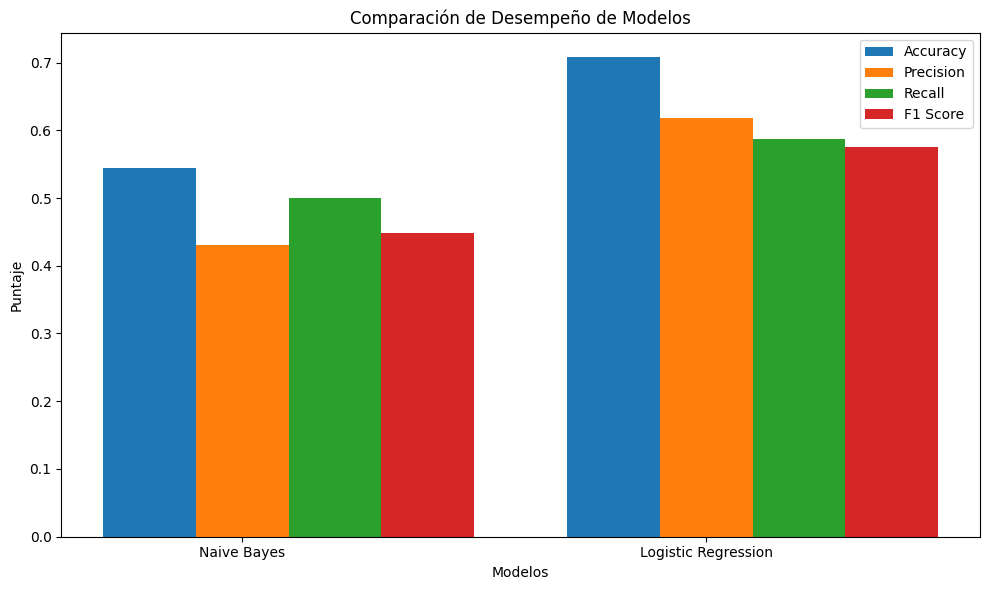

In [28]:
# Métricas para los modelos
models = ['Naive Bayes', 'Logistic Regression']
accuracies = [0.5447, 0.7084]
precisions = [0.4303, 0.6182]
recalls = [0.4997, 0.5870]
f1_scores = [0.4484, 0.5751]

# Gráficos comparativos
x = np.arange(len(models))  # Posición de los modelos
width = 0.2  # Ancho de las barras

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, accuracies, width, label='Accuracy')
ax.bar(x, precisions, width, label='Precision')
ax.bar(x + width, recalls, width, label='Recall')
ax.bar(x + 2 * width, f1_scores, width, label='F1 Score')

ax.set_xlabel('Modelos')
ax.set_ylabel('Puntaje')
ax.set_title('Comparación de Desempeño de Modelos')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
plt.tight_layout()
plt.show()

# Resultados particulares usando 'Unit_class'

Esta clase se creo para hacer subconjuntos del conjunto original y seleccionar algún grupo para conseguir una mejorar precisión en la clasificación.

### Para la clase de unidad = n

In [29]:
# 1. Filtrar el subconjunto para unit_class == 0
subset = train_scaled[train_scaled['unit_class'] == 4]

subsetNB = subset.drop(columns=['unit_class'])

# 2. Separar características (X) y variable objetivo (y)
X1 = subset.drop(columns=['RUL_category', 'unit_class'])  # Eliminar columnas no relevantes
y1 = subset['RUL_category']

#### Naive Bayes

In [30]:
start_time1 = time.time()
# Ejecutar la validación cruzada simple
results_simple = simple_cross_validate(subsetNB, target='RUL_category', k=10, n_bins=10)
print("Resultados de Validación Cruzada Simple:", results_simple)
end_time1 = time.time()
print("this time executed: ", end_time1 - start_time1)

start_time = time.time()
# Ejecutar la validación cruzada estratificada
results_stratified = stratified_cross_validate(subsetNB, target='RUL_category', k=10, n_bins=10)
print("Resultados de Validación Cruzada Estratificada:", results_stratified)
end_time = time.time()
print("this time executed: ", end_time - start_time)

Resultados de Validación Cruzada Simple: {'accuracy': (0.7010529986052998, 0.042793081210699635), 'precision': (0.515569301359905, 0.05111473291105712), 'recall': (0.5854123140839629, 0.02999236217583857), 'f1_score': (0.5340503394664389, 0.04818534312706745)}
this time executed:  0.5375213623046875
Resultados de Validación Cruzada Estratificada: {'accuracy': (0.6948711162305133, 0.036192482925493555), 'precision': (0.5078119404302031, 0.04848192980667942), 'recall': (0.5811736892427, 0.03850506965633231), 'f1_score': (0.5297280991366049, 0.045827155814591534)}
this time executed:  0.5421032905578613


#### Regresión logística

In [31]:
start_time = time.time()
# Evaluar el modelo con Elastic Net (50% L1, 50% L2) y una regularización fuerte (C=0.1)
results1 = evaluate_logistic_regression(X1, y1, C=1, penalty='elasticnet', l1_ratio=0.5)

print("Resultados de validación cruzada:")
print("Simple CV:", results1['simple'])
print("Stratified CV:", results1['stratified'])

end_time = time.time()
print("this time executed: ", end_time - start_time)

Resultados de validación cruzada:
Simple CV: {'accuracy': (0.8158699442119944, 0.024378685526224637), 'precision': (0.6953946100403284, 0.03805907119548154), 'recall': (0.6545002454697496, 0.02115215642729921), 'f1_score': (0.6602682228855471, 0.02659938471284742)}
Stratified CV: {'accuracy': (0.8175496346582628, 0.01794472746033083), 'precision': (0.7007650629112004, 0.040011647357336484), 'recall': (0.656699750378624, 0.032390754686947264), 'f1_score': (0.6663351911681877, 0.033142141272212454)}
this time executed:  13.631757020950317


Para los tiempos de ejecución, Regresión logística comparte el mismo tiempo que con CV simple y estratificada, esto porque se ejecutan al mismo tiempo

## Resultados de Clasificación (unit_class = 0)

## Comparativa de Resultados Clave
| Modelo              | Tipo de Validación    | Accuracy       | Precision      | Recall         | F1 Score       | Tiempo de Ejecución |
|---------------------|-----------------------|----------------|----------------|----------------|----------------|---------------------|
| Naive Bayes         | Simple CV            | 0.4604 ± 0.0434| 0.4216 ± 0.0588| 0.4769 ± 0.0381| 0.4331 ± 0.0527| 0.53 segundos       |
| Naive Bayes         | Stratified CV        | 0.4553 ± 0.0340| 0.4187 ± 0.0473| 0.4701 ± 0.0322| 0.4315 ± 0.0415| 0.56 segundos       |
| Regresión Logística | Simple CV            | 0.5543 ± 0.0305| 0.5224 ± 0.0443| 0.5395 ± 0.0222| 0.5108 ± 0.0297| 6.41 segundos       |
| Regresión Logística | Stratified CV        | 0.5556 ± 0.0213| 0.5377 ± 0.0622| 0.5417 ± 0.0252| 0.5141 ± 0.0315| 6.41 segundos       |

## Resultados de Clasificación (unit_class = 1)

## Comparativa de Resultados Clave
| Modelo              | Tipo de Validación    | Accuracy       | Precision      | Recall         | F1 Score       | Tiempo de Ejecución |
|---------------------|-----------------------|----------------|----------------|----------------|----------------|---------------------|
| Naive Bayes         | Simple CV            | 0.5808 ± 0.0509| 0.4963 ± 0.0530| 0.5462 ± 0.0251| 0.5053 ± 0.0423| 0.69 segundos       |
| Naive Bayes         | Stratified CV        | 0.5913 ± 0.0389| 0.5184 ± 0.0577| 0.5573 ± 0.0363| 0.5251 ± 0.0467| 0.70 segundos       |
| Regresión Logística | Simple CV            | 0.6519 ± 0.0364| 0.5620 ± 0.0392| 0.5821 ± 0.0214| 0.5581 ± 0.0221| 16.15 segundos      |
| Regresión Logística | Stratified CV        | 0.6497 ± 0.0157| 0.5585 ± 0.0459| 0.5756 ± 0.0160| 0.5537 ± 0.0166| 16.15 segundos      |

## Resultados de Clasificación (unit_class = 2)

## Comparativa de Resultados Clave
| Modelo              | Tipo de Validación    | Accuracy       | Precision      | Recall         | F1 Score       | Tiempo de Ejecución |
|---------------------|-----------------------|----------------|----------------|----------------|----------------|---------------------|
| Naive Bayes         | Simple CV            | 0.5544 ± 0.0301| 0.4458 ± 0.0322| 0.5212 ± 0.0261| 0.4633 ± 0.0314| 1.08 segundos       |
| Naive Bayes         | Stratified CV        | 0.5466 ± 0.0317| 0.4367 ± 0.0281| 0.5128 ± 0.0253| 0.4560 ± 0.0292| 1.10 segundos       |
| Regresión Logística | Simple CV            | 0.7120 ± 0.0155| 0.6292 ± 0.0195| 0.5958 ± 0.0127| 0.5844 ± 0.0147| 26.48 segundos      |
| Regresión Logística | Stratified CV        | 0.7112 ± 0.0076| 0.6251 ± 0.0280| 0.5947 ± 0.0128| 0.5837 ± 0.0127| 26.48 segundos      |

## Resultados de Clasificación (unit_class = 3)

## Comparativa de Resultados Clave
| Modelo              | Tipo de Validación    | Accuracy       | Precision      | Recall         | F1 Score       | Tiempo de Ejecución |
|---------------------|-----------------------|----------------|----------------|----------------|----------------|---------------------|
| Naive Bayes         | Simple CV            | 0.5594 ± 0.0439| 0.4316 ± 0.0552| 0.5056 ± 0.0410| 0.4405 ± 0.0523| 0.54 segundos       |
| Naive Bayes         | Stratified CV        | 0.5594 ± 0.0415| 0.4294 ± 0.0462| 0.5004 ± 0.0281| 0.4418 ± 0.0400| 0.55 segundos       |
| Regresión Logística | Simple CV            | 0.7476 ± 0.0191| 0.6208 ± 0.0593| 0.5953 ± 0.0413| 0.5862 ± 0.0394| 21.29 segundos      |
| Regresión Logística | Stratified CV        | 0.7463 ± 0.0188| 0.6226 ± 0.0532| 0.5919 ± 0.0313| 0.5881 ± 0.0346| 21.29 segundos      |

## Resultados de Clasificación (unit_class = 4)

## Comparativa de Resultados Clave
| Modelo              | Tipo de Validación    | Accuracy       | Precision      | Recall         | F1 Score       | Tiempo de Ejecución |
|---------------------|-----------------------|----------------|----------------|----------------|----------------|---------------------|
| Naive Bayes         | Simple CV            | 0.7011 ± 0.0428| 0.5156 ± 0.0511| 0.5854 ± 0.0300| 0.5341 ± 0.0482| 0.55 segundos       |
| Naive Bayes         | Stratified CV        | 0.6949 ± 0.0362| 0.5078 ± 0.0485| 0.5812 ± 0.0385| 0.5297 ± 0.0458| 0.55 segundos       |
| Regresión Logística | Simple CV            | 0.8159 ± 0.0244| 0.6954 ± 0.0381| 0.6545 ± 0.0212| 0.6603 ± 0.0266| 13.43 segundos      |
| Regresión Logística | Stratified CV        | 0.8175 ± 0.0179| 0.7008 ± 0.0400| 0.6567 ± 0.0324| 0.6663 ± 0.0331| 13.43 segundos      |

## Resultados de Clasificación (unit_class = 5)

## Comparativa de Resultados Clave
| Modelo              | Tipo de Validación    | Accuracy       | Precision      | Recall         | F1 Score       | Tiempo de Ejecución |
|---------------------|-----------------------|----------------|----------------|----------------|----------------|---------------------|
| Naive Bayes         | Simple CV            | 0.7334 ± 0.0577| 0.4930 ± 0.0839| 0.5697 ± 0.0683| 0.5109 ± 0.0850| 0.54 segundos       |
| Naive Bayes         | Stratified CV        | 0.7230 ± 0.0423| 0.4884 ± 0.0591| 0.5636 ± 0.0404| 0.5084 ± 0.0546| 0.55 segundos       |
| Regresión Logística | Simple CV            | 0.8098 ± 0.0349| 0.6066 ± 0.0613| 0.5832 ± 0.0511| 0.5818 ± 0.0559| 14.45 segundos      |
| Regresión Logística | Stratified CV        | 0.8114 ± 0.0238| 0.6060 ± 0.0653| 0.5848 ± 0.0463| 0.5850 ± 0.0515| 14.45 segundos      |


# Conclusiones:

## Conclusión del modelo general:

Naive Bayes (NB):

- Es un modelo más rápido de ejecutar (~2.78 segundos en validación simple y estratificada) y tiene una implementación sencilla.
- Sin embargo, su accuracy (54.4%-54.7%) y métricas asociadas (precision, recall, F1 score) son más bajas en comparación con la Regresión Logística.
- Esto puede deberse a su fuerte suposición de independencia entre las características, lo cual no parece ajustarse bien a los datos del problema.

Regresión Logística (RL):

- Aunque es significativamente más lenta (~45.6 segundos en validación simple y estratificada), supera a Naive Bayes en todas las métricas:
- Accuracy: ~70.8%
- Precision: ~62%
- Recall: ~58.6%
- F1 Score: ~57.5%

Este modelo captura mejor las relaciones entre las características y es más robusto en escenarios con dependencias entre las mismas.

Si la precisión y robustez son prioritarias, Regresión Logística es el modelo a elegir para el conjunto general. Sin embargo, si buscas rapidez o tienes limitaciones computacionales, Naive Bayes es una alternativa viable, pero menos precisa.

## Conclusión del modelo usando unit_class

### Naive Bayes (NB):

- El desempeño de Naive Bayes varía considerablemente entre las clases de unit_class. Por ejemplo:
    - unit_class = 5: Muestra su mejor desempeño con accuracy de ~73% en validación simple, pero con métricas de precisión y F1 Score significativamente más bajas (~50%).
    - unit_class = 0: Tiene el desempeño más bajo, con accuracy de ~46% y un F1 Score de ~43%.

Esto sugiere que Naive Bayes se ajusta mejor a ciertos subconjuntos del problema y lucha con otros, posiblemente debido a las suposiciones de independencia de características.

### Regresión Logística (RL):

- Regresión Logística ofrece un desempeño más consistente en todas las clases de unit_class, con accuracy generalmente superior al 70%.
- Su mejor desempeño se da en unit_class = 4 (accuracy de ~81.5% en validación simple y estratificada), mostrando que este grupo tiene características más representativas o fáciles de modelar.


*La agrupación por unit_class permite identificar diferencias importantes en la complejidad y estructura de los datos. Regresión Logística se adapta mejor a todos los grupos, pero Naive Bayes puede ser útil en escenarios donde la velocidad y simplicidad son prioritarias. Una estrategia híbrida, aplicando diferentes modelos según el grupo, podría maximizar el desempeño global.* 

### Este proyecto demostró que segmentar los datos y aplicar estrategias diferenciadas puede mejorar significativamente el entendimiento y el desempeño de los modelos. Aunque Regresión Logística fue el modelo más robusto, Naive Bayes sigue siendo útil en escenarios donde la velocidad es una prioridad. Además, se consiguió mejorar la precisión del modelo comparado al uso de regresiones lineales. De esta manera, el método propuesto se puede considerar como una buena mejora al tratamiento de este problema